In [1]:
# Dataframe

import numpy
import pandas
myarray=numpy.array([[1,2,3], [4,5,6]])
rownames=['a','b']
colnames=['uno', 'dos', 'tres']

mydataframe=pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)

   uno  dos  tres
a    1    2     3
b    4    5     6


In [2]:
#Cargando data CSV

from pandas import read_csv
url='https://goo.gl/bDdBiA'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data=read_csv(url, names=names)
print(data.shape)

(768, 9)


In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Datos estadísticos

description=data.describe()
print(description)

             preg        plas        pres  ...        pedi         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


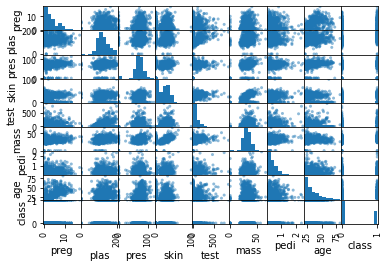

In [5]:
#Graficando la matriz

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()



In [6]:
# Datos estandar
from sklearn.preprocessing import StandardScaler

array=data.values

#Separamos los arrays en componentes de entrada y salida
X=array[:,0:8]
Y=array[:,8]

scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)

#Resumen de datos transformados
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [10]:
#Evaluación usando Cross-Validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression


kfold=KFold(n_splits=10, random_state=7)
model=LogisticRegression()
results=cross_val_score(model, X, Y, cv=kfold)
print('Certeza: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Certeza: 77.343% (5.337%)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
#Cross-Validatio Classification LogLoss

kfold=KFold(n_splits=10, random_state=None)
model=LogisticRegression(solver='liblinear')
scoring='neg_log_loss'
results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('Perdida: %.3f%% (%.3f)' % (results.mean(), results.std()))


Perdida: -0.493% (0.047)


In [12]:
#Regresion KNN

from sklearn.neighbors import KNeighborsRegressor

url='https://goo.gl/FmJUSM'
names=['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataframe=read_csv(url, delim_whitespace=True, names=names)

array=dataframe.values
X=array[:,0:13]
Y=array[:,13]

kfold=KFold(n_splits=10, random_state=None)
model=KNeighborsRegressor()
scoring='neg_mean_squared_error'
results=cross_val_score(model, X,Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


In [17]:
#Comparando algoritmos

from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Cargando los datos
url='https://goo.gl/bDdBiA'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe=read_csv(url, names=names)

array=dataframe.values

#Separamos los arrays en componentes de entrada y salida
X=array[:,0:8]
Y=array[:,8]

#Preparacion del modelo

models=[]
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))

#Evaluar cada modelo por turno
results=[]
names=[]
scoring='accuracy'
for name, model in models:
  kfold=KFold(n_splits=10, random_state=None)
  cv_results=cross_val_score(model, X,Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))




LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid=dict(alpha=alphas)
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297233
1.0


In [21]:
#Clasificacion Forest aleatoria

from sklearn.ensemble import RandomForestClassifier

num_trees=100
max_features=3

kfold=KFold(n_splits=10, random_state=None)
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model, X,Y,cv=kfold)
print(results.mean())

0.7734107997265892


In [22]:
#Guardando modelo usando Pickle

from sklearn.model_selection import train_test_split

import pickle

test_size=0.33
seed=7

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=test_size, random_state=seed)

# Entrenando el modelo con 33% de datos
model=LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

#Guardando el modelo
filename='Modelo_listo.sav'
pickle.dump(model, open(filename,'wb'))

#Cargando el modelo guardado
cargar_modelo=pickle.load(open(filename, 'rb'))
result=cargar_modelo.score(X_test, Y_test)
print(result)



0.7559055118110236
